<a href="https://colab.research.google.com/github/AmiMunshi/Introduction_to_Python_Programming/blob/main/DCT_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.fftpack import dct, idct
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
#Applying 
a= [4, 3,2,1]
A= dct(a, axis=0, norm= "ortho")

In [ ]:
aest = idct(A, axis=0, norm="ortho")
print(aest)

[4. 3. 2. 1.]


In [2]:
#Function to implement 2D DCT and IDCT
def dct2(a):
  return dct(dct(a, axis=0, norm= "ortho"), axis= 1, norm="ortho")

def idct2(a):
  return idct(idct(a, axis=0, norm="ortho"), axis=1, norm="ortho")



In [ ]:
# DCT and IDCT example on a random matrix
#Generate a random integer matrix of size x X y

f= np.random.randint(7,11, size=(8,8))
print(f)
F= dct2(f)
print(F)

[[10  8 10  7  7  7 10  9]
 [ 8  7  8  8  9 10  8  7]
 [ 8  8  7 10 10  7 10 10]
 [ 7  8  9 10 10  9  9  7]
 [10  7 10  8  7  9 10 10]
 [ 8  7  9  8 10  9  9  9]
 [ 8  8 10  9  9  9  7  8]
 [ 8  8  9  9  8  9  8  8]]
[[ 6.83750000e+01 -1.38307630e+00 -1.26212710e+00 -2.24038298e-01
   1.25000000e-01  1.59206575e+00  1.19928529e+00  1.56196461e+00]
 [-2.38336345e-01 -3.72767452e-01  1.43383216e+00  4.81446997e-01
   1.70694918e-01  7.93630470e-01 -1.38208547e+00  7.82822771e-01]
 [-1.22249893e+00  1.52629322e+00  8.25825215e-01 -6.69267622e-02
  -7.04516471e-01 -3.36463555e-01  7.74048519e-01 -1.38820787e-01]
 [ 2.73490476e-01  3.06284951e-01  2.39414888e+00 -1.55253894e-01
  -9.79396931e-01  5.61891776e-01  2.11222556e+00  1.66641308e+00]
 [ 3.75000000e-01  8.89667502e-01  1.70085322e+00 -8.48031057e-01
  -1.37500000e+00  1.54875493e+00  5.13174755e-01  1.67908355e-01]
 [ 3.58870334e-01  8.94247094e-01 -1.13047163e+00 -1.17554509e+00
   2.47605223e-01 -5.21522802e-01 -1.19560718e+00  4

In [ ]:
fest= idct2(F)
print(fest)

[[10.  8. 10.  7.  7.  7. 10.  9.]
 [ 8.  7.  8.  8.  9. 10.  8.  7.]
 [ 8.  8.  7. 10. 10.  7. 10. 10.]
 [ 7.  8.  9. 10. 10.  9.  9.  7.]
 [10.  7. 10.  8.  7.  9. 10. 10.]
 [ 8.  7.  9.  8. 10.  9.  9.  9.]
 [ 8.  8. 10.  9.  9.  9.  7.  8.]
 [ 8.  8.  9.  9.  8.  9.  8.  8.]]


In [ ]:
#Find Energy of DCT of the image
fenergy= np.sum(f**2)
print(fenergy)
Fenergy= np.sum(F**2)
print(Fenergy)

4749
4749.000000000001


In [ ]:
#Find energy in the dc coefficient
F[0,0]**2


4675.140625000002

In [ ]:
# Retain coefficients with energy more than 1% of the total energy
P= 0.01*Fenergy
print(P)

47.49000000000001


In [ ]:
Fnew=  np.where(F**2 >P, F, 0)
print(Fnew)

[[68.375  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.   ]]


In [ ]:
#Finding the nonzero values in the Fnew matrix

ind,val= np.unique(Fnew, return_counts=True)
nonzeros= np.sum(val[np.where(ind!=0)])
print(nonzeros)

1


In [ ]:
#Compression ration
x=8
y=8
CompressionRatio= x*y/nonzeros
print(CompressionRatio)

64.0


In [ ]:
#retrieving the estimated matrix of the original matrix

fest= idct2(F)
print(fest)


[[10.  8. 10.  7.  7.  7. 10.  9.]
 [ 8.  7.  8.  8.  9. 10.  8.  7.]
 [ 8.  8.  7. 10. 10.  7. 10. 10.]
 [ 7.  8.  9. 10. 10.  9.  9.  7.]
 [10.  7. 10.  8.  7.  9. 10. 10.]
 [ 8.  7.  9.  8. 10.  9.  9.  9.]
 [ 8.  8. 10.  9.  9.  9.  7.  8.]
 [ 8.  8.  9.  9.  8.  9.  8.  8.]]


In [ ]:
#Obtain Mean square error
mse= np.sum((f-fest)**2)/(x*y)
print(mse)

9.133530168262027e-30


In [ ]:
#Retain first row and first column
Fnew2= np.zeros((x,y), dtype="float")
Fnew2[0,:]= F[0,:]
Fnew2[:,0]=F[:,0]
print(Fnew2)

[[68.375      -1.3830763  -1.2621271  -0.2240383   0.125       1.59206575
   1.19928529  1.56196461]
 [-0.23833635  0.          0.          0.          0.          0.
   0.          0.        ]
 [-1.22249893  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.27349048  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.375       0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.35887033  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.64167466  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.82286744  0.          0.          0.          0.          0.
   0.          0.        ]]


In [ ]:
#Retain only the first four coeffients
Fnew3= np.zeros((x,y), dtype="float")
Fnew3[0:2,0:2]= F[0:2,0:2]
print(Fnew3)

[[68.375      -1.3830763   0.          0.          0.          0.
   0.          0.        ]
 [-0.23833635 -0.37276745  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


In [3]:
img= cv2.imread("/content/Lena.tif",0) #Read the image
m,n= img.shape


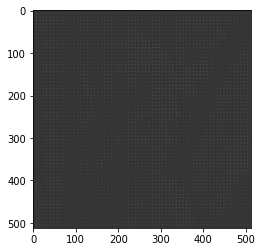

In [4]:
#Find DCT of the given image using dct2 function
#Apply dct2 function on 8x8 blocks

N=8

imgdct= np.zeros((m,n), dtype=int) #creating a matrix to store the dct coefficients of the image

for row in range(0,m//N):
  for col in range(0, n//N):
    imgdct[row*N: (row+1)*N, col*N:(col+1)*N]= dct2(img[row*N: (row+1)*N, col*N:(col+1)*N])
plt.imshow(imgdct,cmap= "gray")

In [21]:
#For compression, retaining coefficients haveing P energy
#Retaining coefficients having 1% of the total energy
energy= np.sum(img**2)  #Total energy of the image
#print(energy)

P= 0.001*energy
#print(P)

Inew= np.where(imgdct**2>P, imgdct, 0) # retaining coefficients having more than P energy

#Finding the nonzero values in the Inew matrix
ind,val= np.unique(Inew, return_counts=True)
nonzeros= np.sum(val[np.where(ind!=0)])
print(nonzeros)


4520


In [22]:
#Total coefficients in the original image
Total_coef= m*n
print(Total_coef)


262144


In [23]:
CR= Total_coef/nonzeros
print(CR)

57.99646017699115


In [24]:
#Find IDCT of the imgdct matrix to obtain using idct2 function

imgnew= np.zeros((m,n),dtype=int)
for row in range(0,m//N):
  for col in range(0, n//N):
    imgnew[row*N: (row+1)*N, col*N:(col+1)*N]= idct2(Inew[row*N: (row+1)*N, col*N:(col+1)*N])


Text(0.5, 1.0, 'Reconstructed image after compression')

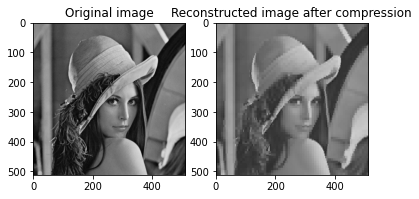

In [25]:
#Plotting the original and reconstructed image
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(imgnew,cmap="gray")
plt.title("Reconstructed image after compression")
